   # Predict The Criminal

Problem Statement :
    There has been a surge in crimes committed in recent years, making crime a top cause of concern for law enforcement.
    If we are able to estimate whether someone is going to commit a crime in the future, we can take precautions and be
    prepared.Dataset contains answers to various questions concerning the professional and private 
    lives of several people. A few of them have been arrested for various small and large crimes in the past. Use the 
    given data to predict if the people in the test data will commit a crime. The train data consists of 45718 rows, 
    while the test data consists of 11430 rows.

In [2]:
#importing the required libraries
#for data handling 
import pandas as pd
import numpy as np
#for visualization
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
%matplotlib inline

### Data Collection

In [3]:
#importing training and test data set
train0 = pd.read_csv("PredictTheCriminal/criminal_train.csv")
test0 = pd.read_csv("PredictTheCriminal/criminal_test.csv")

In [4]:
print("Shape of the training Data: ",train0.shape)
print("Shape of the testing data: ",test0.shape)

Shape of the training Data:  (45718, 72)
Shape of the testing data:  (11430, 71)


This shows the count of Criminal Feature in the training Data.
The graph shows that Dataset is Imbalanced.

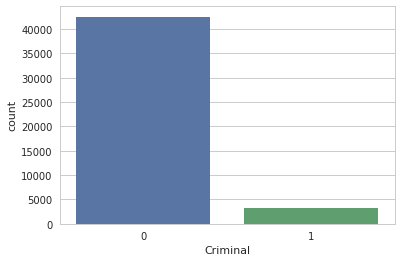

In [5]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Criminal' , data = train0)

In [6]:
#combining the training and test dataset for Data Preprocessing
test0['Criminal'] = -1
combi = pd.concat([train0,test0])

#### Overview of data

These are the top 5 rows of data set.

In [7]:
combi.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


#### Shape of the Dataset

On combining dataset has 57148 rows and 72 columns.

In [8]:
combi.shape

(57148, 72)

#### Describing the combi dataset

it shows the mean,standard devaiation, minimum and maximum values of each feature column

In [9]:

combi.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,5.714800e+04,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,...,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000,57148.000000
mean,5.447696e+07,3.353696,0.476745,3.427417,1.001470,2.085795,1.007104,1.161773,1.010779,97.380346,...,2.209911,2.225432,1.644397,1.763579,1.978652,1.978389,4684.231944,40024.130066,1.494855,-0.144449
std,2.553105e+07,1.178147,0.887479,1.428310,0.056724,1.102372,0.120160,0.468352,0.144628,12.409550,...,5.207833,5.205694,0.618589,0.772249,0.145268,0.146130,5720.199024,237.239026,0.500188,0.484462
min,1.000192e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.239309e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1245.962308,40013.000000,1.000000,0.000000
50%,5.418377e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2722.852911,40025.000000,1.000000,0.000000
75%,7.618517e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5764.099093,40039.000000,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,109100.623000,40050.000000,2.000000,1.000000


### Data Preprocessing

Convert all values to int32 for easy computation beacuase by dafualt numpy stores all values as int64

In [10]:
header = list(combi.columns.values)
for head in header:
    combi[head] = combi[head].astype(np.int32)

#### Feature Engineering

Here we are making new features from **imputed** and **revised** values in the dataset.

In [11]:
combi['nIRHHSIZ2'] = combi['IIHHSIZ2'].apply(lambda x : x**2) + combi['IRHHSIZ2']
combi['nIRKI17_2'] = combi['IIKI17_2'].apply(lambda x : x**2) + combi['IRKI17_2']
combi['nIRHH65_2'] = combi['IIHH65_2'].apply(lambda x : x**2) + combi['IRHH65_2']

combi['nIRMCDCHP'] = combi['IIMCDCHP'].apply(lambda x : x**2) + combi['IRMCDCHP']
combi['nIRMEDICR'] = combi['IIMEDICR'].apply(lambda x : x**2) + combi['IRMEDICR']
combi['nIRCHMPUS'] = combi['IICHMPUS'].apply(lambda x : x**2) + combi['IRCHMPUS']
combi['nIRPRVHLT'] = combi['IIPRVHLT'].apply(lambda x : x**2) + combi['IRPRVHLT']

combi['nIROTHHLT'] = combi['IIOTHHLT'].apply(lambda x : x**2) + combi['IROTHHLT']
combi['nIRINSUR4'] = combi['IIINSUR4'].apply(lambda x : x**2) + combi['IRINSUR4']
combi['nIRFAMSOC'] = combi['IIFAMSOC'].apply(lambda x : x**2) + combi['IRFAMSOC']

combi['nIRFAMSSI'] = combi['IIFAMSSI'].apply(lambda x : x**2) + combi['IRFAMSSI']
combi['nIRFSTAMP'] = combi['IIFSTAMP'].apply(lambda x : x**2) + combi['IRFSTAMP']
combi['nIRFAMPMT'] = combi['IIFAMPMT'].apply(lambda x : x**2) + combi['IRFAMPMT']

combi['nIRFAMSVC'] = combi['IIFAMSVC'].apply(lambda x : x**2) + combi['IRFAMSVC']

combi['nIRWELMOS'] = combi['IIWELMOS'].apply(lambda x : x**2) + combi['IRWELMOS']
combi['nIRPINC3'] = combi['IIPINC3'].apply(lambda x : x**2) + combi['IRPINC3']
combi['nIRFAMIN3'] = combi['IIFAMIN3'].apply(lambda x : x**2) + combi['IRFAMIN3']

#### Data Reduction

Removing the unimportant features.

In [12]:
combi = combi.drop(['IIHHSIZ2','IIKI17_2','IIHH65_2','IIMCDCHP','IIMEDICR','IICHMPUS',
                    'IIPRVHLT','IIOTHHLT','IIINSUR4','IIFAMSOC','IIFAMSSI','IIFSTAMP',
                    'IIFAMPMT','IIFAMSVC','IIWELMOS','IIPINC3','IIFAMIN3','IRHHSIZ2',
                    'IRKI17_2','IRHH65_2','IRMCDCHP','IRMEDICR','IRCHMPUS','IRPRVHLT',
                   'IROTHHLT','IRINSUR4','IRFAMSOC','IRFAMSSI','IRFSTAMP','IRFAMPMT',
                    'IRFAMSVC','IRWELMOS','IRPINC3','IRFAMIN3'],axis = 1)

Separating out the **Training** and **Testing** Dataset

In [13]:
train = combi[:45718]
test = combi[45718:]

### Analysing Features

Effect of **IFATHER** feature column on response variable i.e. **Criminal**

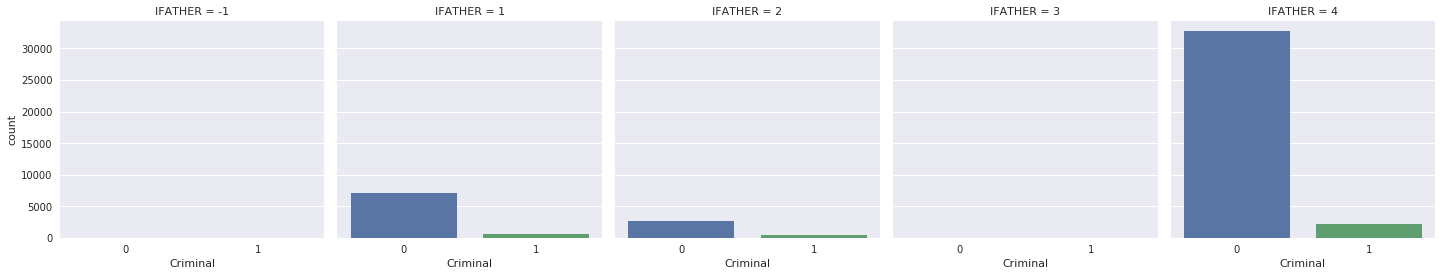

In [14]:
#feature 'criminal' split (faceted) over the feature 'IFATHER'.
sns.set(rc={'figure.figsize':(25,5)})
sns.factorplot(x='Criminal', col='IFATHER', kind='count', data=train);

Effect of **GRPHLTIN** feature on response variable i.e. **Criminal** 

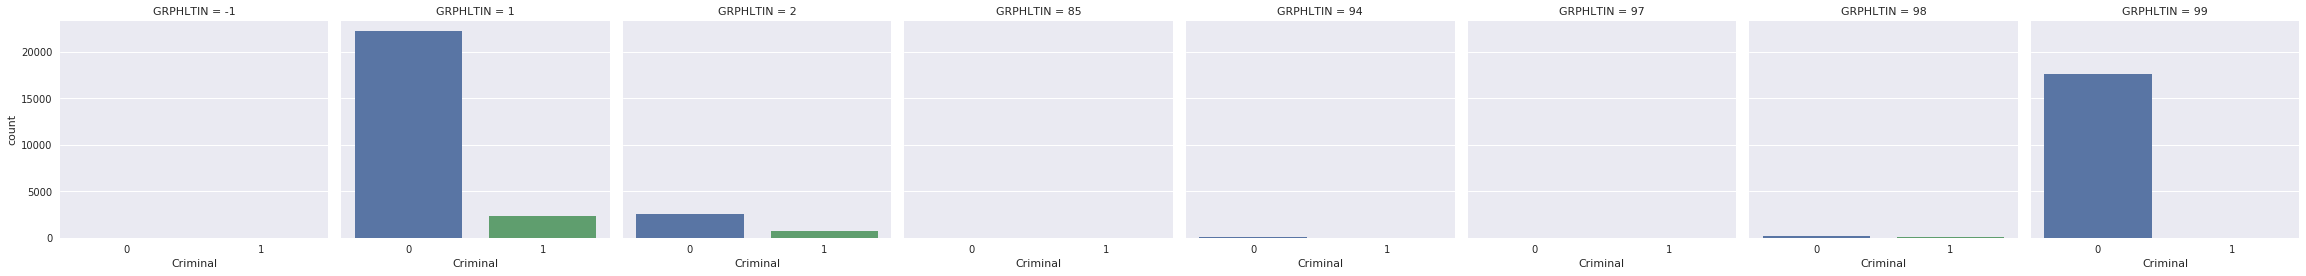

In [15]:
#feature 'criminal' split (faceted) over the feature 'IFATHER'.

sns.factorplot(x='Criminal', col='GRPHLTIN', kind='count', data=train);

Showing the Correlation between the Features.
By default pandas uses **Pearson Correlation**

In [16]:
train.corr()

,PERID,IFATHER,NRCH17_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,...,nIROTHHLT,nIRINSUR4,nIRFAMSOC,nIRFAMSSI,nIRFSTAMP,nIRFAMPMT,nIRFAMSVC,nIRWELMOS,nIRPINC3,nIRFAMIN3
PERID,1.000000,-0.000370,-0.004661,-0.010388,-0.001984,-0.007131,-0.010174,-0.007730,-0.007724,0.004645,...,0.003368,-0.011601,-0.002675,0.000484,-0.001377,0.000282,0.003979,0.000680,-0.008999,-0.005724
IFATHER,-0.000370,1.000000,0.292649,0.001902,0.752435,-0.018429,-0.009047,-0.017545,-0.025719,-0.025857,...,-0.129659,0.027931,-0.049931,-0.008396,-0.003029,-0.009655,-0.021249,-0.000397,0.377543,-0.056526
NRCH17_2,-0.004661,0.292649,1.000000,0.050937,0.254858,-0.027217,-0.039192,-0.031363,-0.037377,0.016761,...,-0.049525,-0.012314,0.016479,-0.035711,-0.096950,-0.042988,-0.051028,-0.065881,0.158497,-0.029905
PRXRETRY,-0.010388,0.001902,0.050937,1.000000,-0.074424,-0.063721,-0.079845,-0.045427,-0.084472,-0.019851,...,0.023266,-0.083556,-0.103806,-0.095575,-0.063362,-0.100639,-0.091185,0.014139,0.050783,-0.088197
PRXYDATA,-0.001984,0.752435,0.254858,-0.074424,1.000000,0.013267,0.023292,0.009193,0.018227,-0.026258,...,-0.117077,0.058908,0.008400,0.043505,0.034608,0.028901,0.025293,0.005435,0.369612,-0.010035
MEDICARE,-0.007131,-0.018429,-0.027217,-0.063721,0.013267,1.000000,0.466911,0.480127,0.400357,0.060846,...,-0.059208,0.458351,0.247363,0.246677,0.229947,0.268760,0.276371,-0.054980,0.036931,0.072134
CAIDCHIP,-0.010174,-0.009047,-0.039192,-0.079845,0.023292,0.466911,1.000000,0.405723,0.398808,0.042397,...,-0.071737,0.587168,0.198937,0.219105,0.219168,0.327873,0.251261,-0.049925,0.044911,0.087860
CHAMPUS,-0.007730,-0.017545,-0.031363,-0.045427,0.009193,0.480127,0.405723,1.000000,0.444354,0.044517,...,-0.037163,0.357475,0.257993,0.283812,0.281345,0.300849,0.323318,-0.054106,0.053109,0.069189
PRVHLTIN,-0.007724,-0.025719,-0.037377,-0.084472,0.018227,0.400357,0.398808,0.444354,1.000000,0.164004,...,-0.088344,0.597660,0.221174,0.248798,0.216206,0.265164,0.277364,-0.061174,0.018959,0.061391
GRPHLTIN,0.004645,-0.025857,0.016761,-0.019851,-0.026258,0.060846,0.042397,0.044517,0.164004,1.000000,...,-0.501591,0.262667,0.005669,-0.002343,-0.195174,0.020386,0.010265,-0.193555,-0.259032,-0.250585


Removing the previously added Criminal Column in test Dataset

In [17]:
test = test.drop(['Criminal'],axis =1)

Removing **PERID** column from training set because it is not useful as they are all unique values

In [18]:
train = train.drop(['PERID'],axis=1)

Splitting Dependent and Response Variables

In [19]:
x = train.drop(['Criminal'],axis=1)
y = train['Criminal']

In [20]:
x.head()

,IFATHER,NRCH17_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,...,nIROTHHLT,nIRINSUR4,nIRFAMSOC,nIRFAMSSI,nIRFSTAMP,nIRFAMPMT,nIRFAMSVC,nIRWELMOS,nIRPINC3,nIRFAMIN3
0,4,2,99,99,2,1,2,2,99,99,...,180,2,3,3,2,3,3,180,2,5
1,4,1,99,99,2,2,2,1,1,99,...,180,2,3,3,2,3,3,180,2,2
2,4,1,99,99,2,1,2,2,99,99,...,180,2,2,3,2,3,3,180,3,3
3,4,0,99,99,2,2,2,1,1,99,...,180,2,3,3,3,3,3,180,8,8
4,1,0,99,1,2,1,2,2,99,99,...,180,2,3,3,2,3,2,2,2,3


**Splitting training and testing data taken from the Original Training Data**. This is done in order control the overfitting of model.

In [21]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32002, 53)
(13716, 53)
(32002,)
(13716,)


### Making Model

In [1]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = logreg.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,matthews_corrcoef
gradient_accy = round(accuracy_score(y_test,y_pred), 3)
print(gradient_accy)
print(precision_score(y_test,y_pred,average='micro'))
print(matthews_corrcoef(y_test,y_pred))

0.932
0.932050160397
0.200103160376


In [26]:
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.94      1.00      0.96     12766
          1       0.56      0.09      0.15       950

avg / total       0.91      0.93      0.91     13716

[[12703   869]
 [   63    81]]


Importing the extreme Gradient Boosting library

In [41]:
import xgboost as xgb

Making the object of classifier

In [42]:
gbm = xgb.XGBClassifier(max_depth=7, n_estimators=2600, learning_rate=0.02,scale_pos_weight=17.39)

Fitting the model over training data

In [43]:
%time gbm.fit(x_train, y_train)

CPU times: user 3min 33s, sys: 0 ns, total: 3min 33s
Wall time: 3min 33s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=2600,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=17.39, seed=None,
       silent=True, subsample=1)

Predicting the result over small testing data (This is not the actual testing data).

In [44]:
y_pred = gbm.predict(x_test)

Checking the metrics to check the performance of model.

In [45]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,matthews_corrcoef
gradient_accy = round(accuracy_score(y_test,y_pred), 3)
print(gradient_accy)
print(precision_score(y_test,y_pred,average='micro'))
print(matthews_corrcoef(y_test,y_pred))

0.937
0.936570428696
0.623205136011


In [46]:
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97     12766
          1       0.53      0.81      0.64       950

avg / total       0.95      0.94      0.94     13716

[[12075   179]
 [  691   771]]


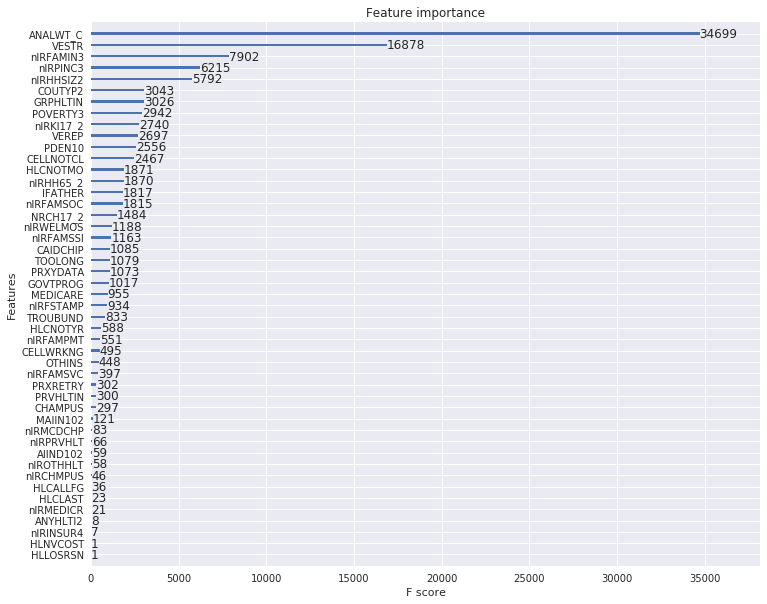

In [47]:
plt.rcParams["figure.figsize"] = (12,10)
xgb.plot_importance(gbm)

Prediction over Actual testing data.

In [48]:
final_test = test.drop(['PERID'],axis=1)

In [49]:
yFinalPred = gbm.predict(final_test)

In [50]:
sub1 = pd.DataFrame({'PERID':test.PERID, 'Criminal':yFinalPred})
sub1 = sub1[['PERID', 'Criminal']]

In [51]:
#write submission files
#sub1.to_csv('FinalOutput/finalPrediction.csv', index=False)